In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# **Part 2: Driver Signups Analysis**

In [ ]:
path="/content/drive/MyDrive/1108 Uber Case/UT - R&MP_Deepdive_Dataset (b) Part 2.xlsx"
data=pd.read_excel(path)
data_head = data.head(10)
print(data_head)
print(data.columns)

   id city_name    signup_os signup_channel signup day signup_date   bgc_date  \
0   1    Strark      ios web           Paid   Saturday  2016-01-02        NaT   
1   2    Strark      windows           Paid   Thursday  2016-01-21        NaT   
2   3   Wrouver      windows        Organic     Monday  2016-01-11 2016-01-11   
3   4    Berton  android web       Referral     Friday  2016-01-29 2016-02-03   
4   5    Strark  android web       Referral     Sunday  2016-01-10 2016-01-25   
5   6    Strark  android web       Referral     Monday  2016-01-18 2016-01-18   
6   7    Strark      ios web           Paid   Thursday  2016-01-14 2016-01-16   
7   8    Strark      ios web       Referral    Tuesday  2016-01-26 2016-02-05   
8   9    Strark          NaN       Referral    Tuesday  2016-01-05        NaT   
9  10    Berton      ios web           Paid     Monday  2016-01-25        NaT   

  vehicle_added_date vehicle_make vehicle_model  vehicle_year  \
0                NaT          NaN          

**Perform any cleaning, exploratory analysis, and/or visualisations to use the provided data for this analysis (a few sentences / plots describing your approach will suffice). **

To cleanse the date, I took the following steps:
1) Converted the columns to datetime
2) Filled missing values to unknown or 0 so it can be consistent
3) Added a function to track drivers who has taken a first trip
4) Removed any null data in id and signup_date

In [ ]:
# Key columns = id, signup_date

#Converting columns to datetime
date_columns = ['signup_date', 'bgc_date', 'vehicle_added_date', 'first_completed_date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

#Fill missing values to unknown or 0
data['signup_os'] = data['signup_os'].fillna('Unknown')
data['vehicle_make'] = data['vehicle_make'].fillna('Unknown')
data['vehicle_model'] = data['vehicle_model'].fillna('Unknown')
data['vehicle_year'] = data['vehicle_year'].fillna(0)

#Flag for Drivers Who Took First Trip
data['has_first_trip'] = data['first_completed_date'].notna().astype(int)

# Cleansing key columns with NaN
data_cleaned = data.dropna(subset=['id', 'signup_date'])

#print(data_cleaned.info())
#print(data_cleaned.head())

**What fraction of the driver signups took a first trip?**

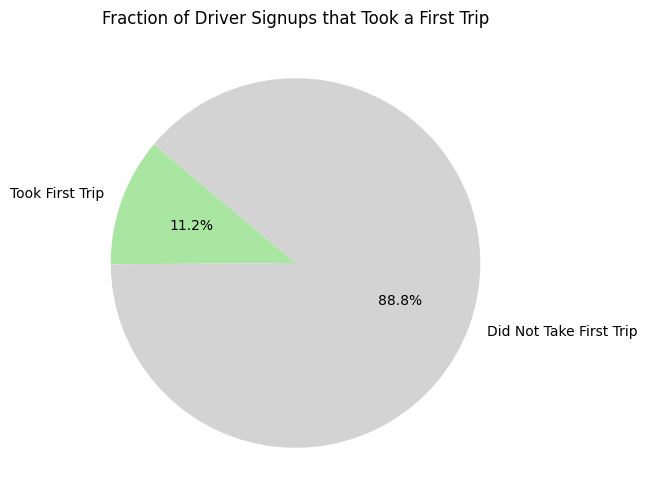

In [ ]:
##Calculate total signups
total_signups = data_cleaned['id'].nunique()

##Calculate drivers who took a first trip
drivers_first_trip = data_cleaned['has_first_trip'].sum()

##Fraction of driver signups that took a first trip
fraction_first_trip = drivers_first_trip / total_signups
#print(f"Fraction of driver signups that took a first trip: {fraction_first_trip:.2f}")
fraction_first_trip

# Data for the pie chart
fractions = [data_cleaned['has_first_trip'].sum(), data_cleaned['id'].nunique() - data_cleaned['has_first_trip'].sum()]
labels = ['Took First Trip', 'Did Not Take First Trip']

colors = ['#A8E6A1', '#D3D3D3']

# Plotting the pie chart with lighter colors
plt.figure(figsize=(6, 6))
plt.pie(fractions, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Fraction of Driver Signups that Took a First Trip')
plt.show()

Give a summary of the data:
*   How many drivers took their first trip?
*   Breakdown of channels
*   Typical time to background check and to first trip

Drivers that took their first trip: 6137 

  Signup Channel  Total Signups  First Trip Count
0        Organic          13427              1210
1           Paid          23938              1482
2       Referral          17316              3445 



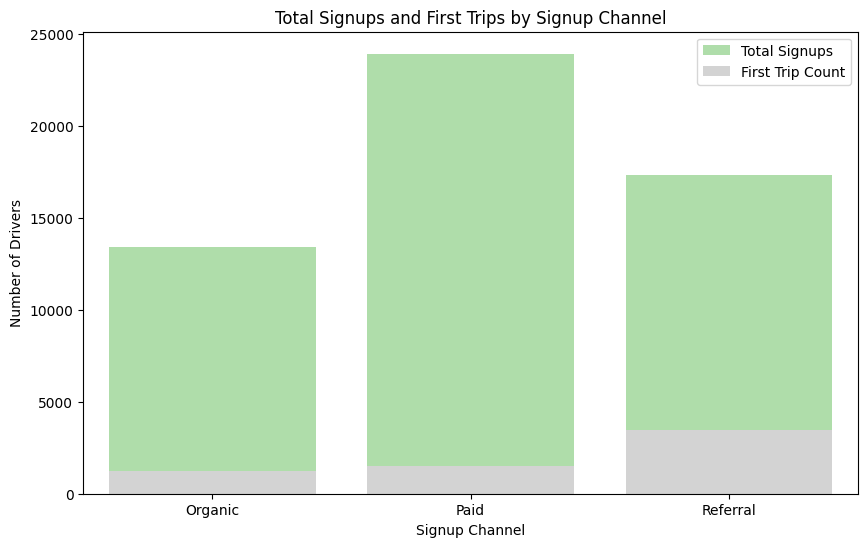

Average time from sign up to to background check: 10.0 days
Average time from sign up to first trip: 12.0 days


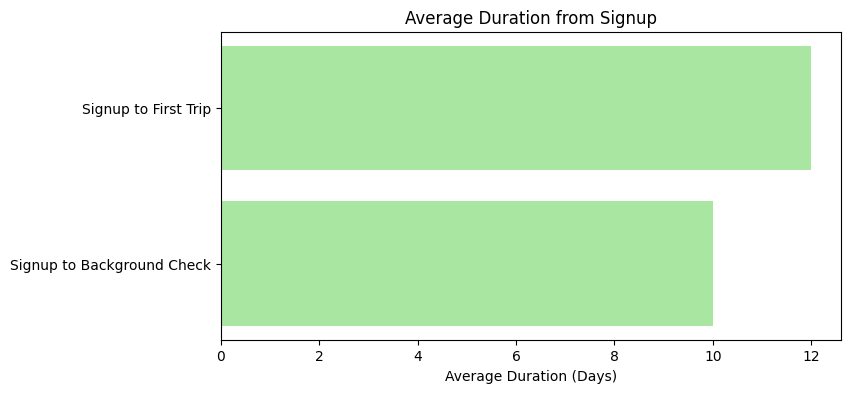

In [ ]:
# How many drivers took their first trip?
drivers_first_trip = data_cleaned['has_first_trip'].sum()
print("Drivers that took their first trip:", drivers_first_trip,"\n")

# Breakdown of channels
channel_breakdown = data_cleaned.groupby('signup_channel').agg(
    Total_Signups=('id', 'count'),
    First_Trip_Count=('has_first_trip', 'sum')
).reset_index()
channel_breakdown.columns = ['Signup Channel', 'Total Signups', 'First Trip Count']
print(channel_breakdown,"\n")

# Colours
primary_color = '#A8E6A1'
secondary_color = '#D3D3D3'

# Chart 1: Bar Chart - Total Signups and First Trips by Signup Channel
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_breakdown, x='Signup Channel', y='Total Signups', color=primary_color, label='Total Signups')
sns.barplot(data=channel_breakdown, x='Signup Channel', y='First Trip Count', color=secondary_color, label='First Trip Count')
plt.title("Total Signups and First Trips by Signup Channel")
plt.xlabel("Signup Channel")
plt.ylabel("Number of Drivers")
plt.legend()
plt.show()

# Calculate durations in days
data_cleaned['bgc_duration'] = (data_cleaned['bgc_date'] - data_cleaned['signup_date']).dt.days
data_cleaned['first_trip_duration'] = (data_cleaned['first_completed_date'] - data_cleaned['signup_date']).dt.days

# Drop NaNs to calculate the average duration accurately
bgc_duration_mean = data_cleaned['bgc_duration'].dropna().mean().round(1)
first_trip_duration_mean = data_cleaned['first_trip_duration'].dropna().mean().round(1)

print("Average time from sign up to to background check:", bgc_duration_mean,"days")
print("Average time from sign up to first trip:", first_trip_duration_mean,"days")

# Chart 2: Horizontal Bar Chart - Average Duration from Signup
durations = {
    'Signup to Background Check': bgc_duration_mean,
    'Signup to First Trip': first_trip_duration_mean
}

plt.figure(figsize=(8, 4))
plt.barh(list(durations.keys()), list(durations.values()), color=primary_color)
plt.title("Average Duration from Signup")
plt.xlabel("Average Duration (Days)")
plt.show()



**Which signup channel is most effective? Why do you think this is? Is there something we could do to increase driver first trips?**

To identify which signup channel is the most effective, we will look at the conversion rates of each channel.

Signup Channel Effectiveness:

  signup_channel  Total_Signups  First_Trip_Count Conversion_Rate
0        Organic          13427              1210           9.01%
1           Paid          23938              1482           6.19%
2       Referral          17316              3445          19.89%


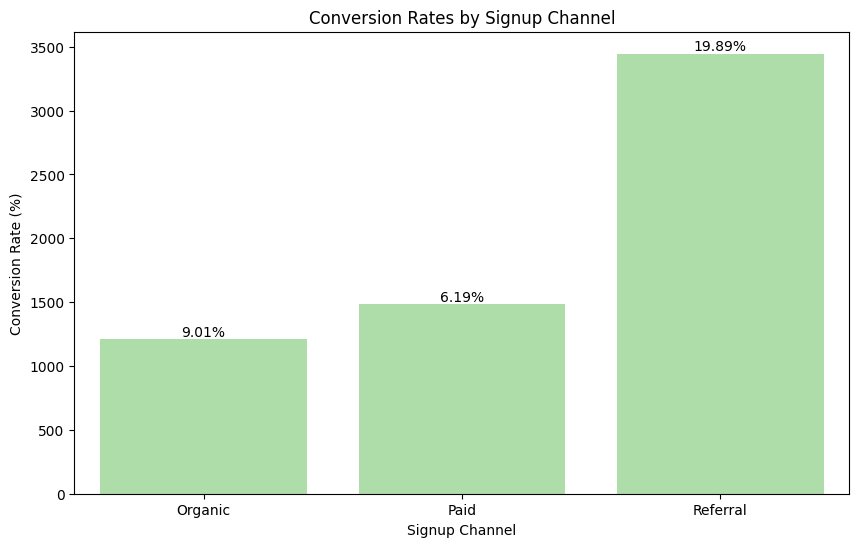

In [ ]:
# Calculate total signups and first trip counts by channel
channel_breakdown = data_cleaned.groupby('signup_channel').agg(
    Total_Signups=('id', 'count'),
    First_Trip_Count=('has_first_trip', 'sum')
).reset_index()

# Calculate the conversion rate and format as percentage
channel_breakdown['Conversion_Rate'] = ((channel_breakdown['First_Trip_Count'] / channel_breakdown['Total_Signups']) * 100).round(2).astype(str) + '%'

# Display the breakdown with conversion rate as a percentage
print("Signup Channel Effectiveness:\n")
print(channel_breakdown)

# Colours
primary_color = '#A8E6A1'  # Light green

# Plotting the conversion rates by signup channel
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_breakdown, x='signup_channel', y='First_Trip_Count', color=primary_color)

# Adding conversion rate labels to each bar
for index, row in channel_breakdown.iterrows():
    plt.text(index, row.First_Trip_Count, row.Conversion_Rate, ha='center', va='bottom', fontsize=10)

plt.title("Conversion Rates by Signup Channel")
plt.xlabel("Signup Channel")
plt.ylabel("Conversion Rate (%)")
plt.show()

:We see that the most effective signup channel based on conversion rate (signup to completed first trip) is **Referral** at **19.89%**.

Referral can be most effective because:

*   Builds on existing trust from friends
*   May include a mutual incentive program, motivating both new and existing drivers.


To increase drivers first trips, we can review it in two perspectives:


*   **Driver's perspective** - Streamline the signup-to-first-trip journey to reduce friction, such as simplifying onboarding and adding FAQs or walkthroughs.
*   **Business's perspective** - Implement post-signup incentives, especially for drivers in Organic and Paid channels, to encourage completing the first trip.





**Are there any other factors that appear to affect the likelihood that a driver takes their first
trip? If there are factors, can you give an explanation/hypothesis as to why this factor is
correlated? Could we leverage any of these insights to increase driver first trips?**

Other factors that may appear to affect the likelihood that a driver takes on their first trip could be:  

1.   Signup Timing
2.   Background Check Completion Duration
3.   Vehicles (Availability / Type)
4.   Signup Platform (OS)

**Signup Timing**

**Hypothesis:** Drivers who sign up on weekends may have more flexibility and motivation to complete their first trip after signup.


In [ ]:
# Categorize day of the week into 'Weekday' and 'Weekend'
data_cleaned['day_category'] = data_cleaned['signup day'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

# Calculate conversion rate by day category (Weekday vs. Weekend)
day_category_conversion = data_cleaned.groupby('day_category').agg(
    Total_Signups=('id', 'count'),
    First_Trip_Count=('has_first_trip', 'sum')
)
day_category_conversion['Conversion_Rate'] = (day_category_conversion['First_Trip_Count'] / day_category_conversion['Total_Signups']) * 100
day_category_conversion['Conversion_Rate'] = day_category_conversion['Conversion_Rate'].round(2)

# Display results
print("Conversion Rate by Day Category (Weekday vs. Weekend):\n")
print(day_category_conversion)



Conversion Rate by Day Category (Weekday vs. Weekend):

              Total_Signups  First_Trip_Count  Conversion_Rate
day_category                                                  
Weekday               40264              4724            11.73
Weekend               14417              1413             9.80


**Result:** Drivers who signup during weekday showed higher conversion rates by **1.93%**.

**Next Steps:** We can further identify when during the weekday is driving the higher conversion rates (peak vs non-peak hours). Once identified, we can do targeted marketing to drive lower conversion times including weekend.

**Background Check Completion Duration**

**Hypothesis:** Drivers with shorter times between signup and background check completion may be more engaged and motivated and not drop-off.

In [ ]:
# Calculate the time difference between signup and background check (in days)
data_cleaned['bgc_duration'] = (data_cleaned['bgc_date'] - data_cleaned['signup_date']).dt.days

# Bucket drivers based on bgc_duration 0-2 days, 3-7 days, and 8+ days buckets
def categorize_bgc_duration(days):
    if days <= 2:
        return '0-2 days'
    elif days <= 7:
        return '3-7 days'
    else:
        return '8+ days'

data_cleaned['bgc_duration_bucket'] = data_cleaned['bgc_duration'].apply(categorize_bgc_duration)

# Calculate conversion rates by bgc_duration_bucket
bgc_conversion = data_cleaned.groupby('bgc_duration_bucket').agg(
    Total_Signups=('id', 'count'),
    First_Trip_Count=('has_first_trip', 'sum')
)
bgc_conversion['Conversion_Rate'] = (bgc_conversion['First_Trip_Count'] / bgc_conversion['Total_Signups']) * 100
bgc_conversion['Conversion_Rate'] = bgc_conversion['Conversion_Rate'].round(2)

# Display the result
print("Conversion Rate by Background Check Duration Bucket:\n")
print(bgc_conversion)


Conversion Rate by Background Check Duration Bucket:

                     Total_Signups  First_Trip_Count  Conversion_Rate
bgc_duration_bucket                                                  
0-2 days                      9910              3647            36.80
3-7 days                      7867              1658            21.08
8+ days                      36904               832             2.25


**Result:** Drivers who complete the background check within 0-2 days have a significantly higher conversion rate (**36.80%**) compared to 3-7 days (**21.08%**) and 8+ days (**2.25%**)

**Next Steps:** We can further investigate what is the root cause of drivers having to wait 3-7 days and 8+ days to complete background checks, and how we can streamline the process to reduce waiting time.

**Vehicles**

**Vehicle Availability Hypothesis:** Drivers with available vehicle ready to use are more inclined to complete their first ride immediately.

**Vehicle Type Hypothesis:** Certain vehicle type owners are more motivated to drive Uber.

In [ ]:
# Create a flag for whether a vehicle was ready to use at signup
data_cleaned['vehicle_ready'] = data_cleaned['vehicle_added_date'].notna().astype(int)

# Calculate first trip conversion rate based on vehicle availability
vehicle_ready_conversion = data_cleaned.groupby('vehicle_ready').agg(
    Total_Signups=('id', 'count'),
    First_Trip_Count=('has_first_trip', 'sum')
)
vehicle_ready_conversion['Conversion_Rate'] = (vehicle_ready_conversion['First_Trip_Count'] / vehicle_ready_conversion['Total_Signups']) * 100
vehicle_ready_conversion['Conversion_Rate'] = vehicle_ready_conversion['Conversion_Rate'].round(2)

vehicle_ready_conversion.index = vehicle_ready_conversion.index.map({1: 'Vehicle Ready', 0: 'Vehicle Not Ready'})

print("Conversion Rate Based on Vehicle Readiness:\n")
print(vehicle_ready_conversion)

Conversion Rate Based on Vehicle Readiness:

                   Total_Signups  First_Trip_Count  Conversion_Rate
vehicle_ready                                                      
Vehicle Not Ready          41547               265             0.64
Vehicle Ready              13134              5872            44.71


In [ ]:
# Filter out rows where vehicle_make or vehicle_model is "Unknown"
filtered_data = data_cleaned[
    (data_cleaned['vehicle_make'] != 'Unknown') &
    (data_cleaned['vehicle_model'] != 'Unknown')
].copy()

# Ensure 'vehicle_make' and 'vehicle_model' are of string type
filtered_data['vehicle_make'] = filtered_data['vehicle_make'].astype(str)
filtered_data['vehicle_model'] = filtered_data['vehicle_model'].astype(str)

# Calculate total signups, first trip counts, and conversion rate by vehicle make and model
vehicle_attribute_counts = filtered_data.groupby(['vehicle_make', 'vehicle_model'])['has_first_trip'].agg(
    Total_Signups='size',  # Simplified using 'size' for total count
    First_Trip_Count='sum'
).reset_index()

# Calculate Conversion_Rate
vehicle_attribute_counts['Conversion_Rate'] = (vehicle_attribute_counts['First_Trip_Count'] / vehicle_attribute_counts['Total_Signups'] * 100).round(2)

# Display top 10 vehicle make/model combinations by First Trip Count
print("\nTop 10 Vehicle Make and Model Combinations by First Trip Count:\n")
print(vehicle_attribute_counts.sort_values(by='First_Trip_Count', ascending=False).head(10))


Top 10 Vehicle Make and Model Combinations by First Trip Count:

    vehicle_make vehicle_model  Total_Signups  First_Trip_Count  \
143        Honda         Civic            689               329   
327       Toyota         Camry            683               313   
330       Toyota       Corolla            688               311   
140        Honda        Accord            595               269   
337       Toyota       Prius V            522               258   
335       Toyota         Prius            369               208   
270       Nissan        Altima            422               181   
282       Nissan        Sentra            330               136   
163      Hyundai        Sonata            259               114   
157      Hyundai       Elantra            255               107   

     Conversion_Rate  
143            47.75  
327            45.83  
330            45.20  
140            45.21  
337            49.43  
335            56.37  
270            42.89  
282         

**Vehicle Availability**

**Result:** Drivers who had a vehicle ready at time of signup showed a higher conversion rate (**44.71%**)

**Next Steps:** We can further investigate why drivers are signing up without a vehicle ready, and if there are alternative solutions we can offer such as rental cars.

**Vehicle Type**

**Result:** Drivers who drive Toyota Prius, Prius V, and Honda Civic account for the highest conversion rate by total first trip completion.

**Next Steps:** Investigate further the characteristics of these 3 driver segments to identify specific rationale to drive conversation rate further.

**Signup Platform (OS)**

**Hypothesis**: Drivers who use a certain OS have a better experience leading to more likely to sign up and complete their first ride.

In [ ]:
# Group by signup_os to calculate total signups and first trip counts
os_conversion = data_cleaned.groupby('signup_os').agg(
    Total_Signups=('id', 'count'),
    First_Trip_Count=('has_first_trip', 'sum')
).reset_index()

# Calculate conversion rate for each OS
os_conversion['Conversion_Rate'] = (os_conversion['First_Trip_Count'] / os_conversion['Total_Signups']) * 100
os_conversion['Conversion_Rate'] = os_conversion['Conversion_Rate'].round(2)

# Display the results sorted by Conversion Rate
print("Conversion Rate by Signup OS:\n")
print(os_conversion.sort_values(by='Conversion_Rate', ascending=False))


Conversion Rate by Signup OS:

     signup_os  Total_Signups  First_Trip_Count  Conversion_Rate
3          mac           5824               948            16.28
4        other           3648               498            13.65
5      windows           6776               898            13.25
2      ios web          16632              2191            13.17
1  android web          14944              1454             9.73
0      Unknown           6857               148             2.16


**Result:** Drivers who use Mac **(16.28%)** or Other **(13.65%)** have higher conversion rates.

**Next Steps:** Review what Other OS channel includes and investigate the android web onboarding process to see if further onboarding experience can be improved.


**What would you recommend the business do given what you have found above?**

The main objective is to increase driver activation meaning the the primary metric being conversion rate and secondary metric being signup volumes. Based on the defined metrics and analysis above, I would prioritize the following 3 recommendations:



1. **Reduce Background Check Time** - Shorten processing time to lower drop-offs and encourage first trips
2. **Optimize Android Web Onboarding** - Improve onboarding experience to increase conversions
3. **Expand Referral Programs** - Add incentives and onboarding support to increase signups and conversion rates


**Are there any issues with the dataset or assumptions you have made?**

Key Issues and Assumptions:


1.  Missing data (like driver details and signup_os)
2.  More info on signup times and a longer dataset would improve analysis.
3.   Conversion rate was the main metric since there was no data on driver frequency or retention over time.